In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import random

In [2]:
X_train = np.loadtxt('G:\Data Science\DL Specialization\Multi-layers cat\cat_train_x.csv',delimiter=',')/255.0
Y_train = np.loadtxt('G:\Data Science\DL Specialization\Multi-layers cat\cat_train_y.csv',delimiter=',').reshape(1,X_train.shape[1])

X_test = np.loadtxt('G:\Data Science\DL Specialization\Multi-layers cat\cat_test_x.csv',delimiter=',')/255.0
Y_test = np.loadtxt('G:\Data Science\DL Specialization\Multi-layers cat\cat_test_y.csv',delimiter=',').reshape(1,X_test.shape[1])


In [3]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape #shape: (number of features, number of examples)

((12288, 209), (1, 209), (12288, 50), (1, 50))

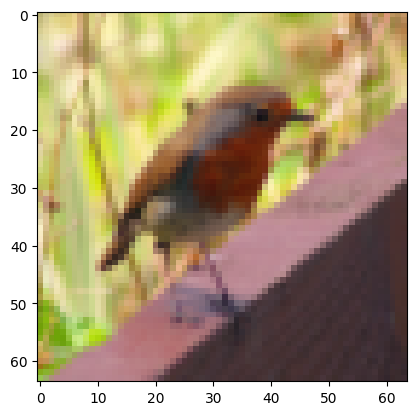

In [4]:
index = random.randrange(0, X_train.shape[1])

# Display the image at the selected index
index = random.randrange(0, X_train.shape[1])
plt.imshow(X_train[:, index].reshape(64,64, 3))
plt.show()

### Activation Functions

In [5]:
def tanh(x):
    return np.tanh(x)

def sigmoid(z): #only in the binary classification problem in the output layer
    A= 1/(1+np.exp(-z))
    return A

# def softmax(z): #only in the multi-class classification problem
#     np.exp(z)/np.sum(np.exp(z),axis=0)

def relu(z):
    A= np.maximum(0,z)
    return A

### Derivatives of Activation Functions 

In [6]:
# def tanh_prime(x):
#     return 1-np.power(tanh(x),2)

def relu_prime(x):
    return np.array(x>0).astype(float)


### Intializing Parameters

In [7]:

def initialize_parameters(layer_dims):
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)-1 # number of layers in the network (because the last layer does not have weights and biases associated with it)
    for l in range(1, L+1):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2/layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
    return parameters



In [8]:
layer_dims = [X_train.shape[0], 100, 200, Y_train.shape[0]]
params = initialize_parameters(layer_dims)

for l in range(1, len(layer_dims)):
    print("Shape of W" + str(l) + ":", params['W' + str(l)].shape)
    print("Shape of B" + str(l) + ":", params['b' + str(l)].shape, "\n")

Shape of W1: (100, 12288)
Shape of B1: (100, 1) 

Shape of W2: (200, 100)
Shape of B2: (200, 1) 

Shape of W3: (1, 200)
Shape of B3: (1, 1) 



### Forward Propagation

In [9]:
def forward_propagation(X, parameters):
    L = len(parameters) // 2
    caches = {}
    A = X
    
    for l in range(1, L):
        A_prev = A
        W = parameters['W' + str(l)]
        b = parameters['b' + str(l)]
        Z = np.dot(W, A_prev) + b
        A = relu(Z)
        
        caches['A' + str(l)] = A_prev
        caches['W' + str(l)] = W
        caches['b' + str(l)] = b
        caches['Z' + str(l)] = Z
    
    # Handle the final layer separately
    WL = parameters['W' + str(L)]
    bL = parameters['b' + str(L)]
    ZL = np.dot(WL, A) + bL
    AL = sigmoid(ZL)
    
    caches['A' + str(L)] = A
    caches['W' + str(L)] = WL
    caches['b' + str(L)] = bL
    caches['Z' + str(L)] = ZL
    
    return AL, caches

### Cost Function 
- Since this is a single class problem not a multi-class the cost function will be 
    
$Cost = - \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{n}[ y_k*log(a_k) ]$



In [10]:
def cost_function(AL, Y):
    m = Y.shape[1]
    cost = -np.sum(Y*np.log(AL) + (1-Y)*np.log(1-AL))/m
    cost = np.squeeze(cost)
    return cost

### Back Propaggation

In [11]:
def back_propagation(AL, Y, parameters, caches):
    grads = {}
    L = len(parameters) // 2
    m = AL.shape[1]
    
    # Compute the gradient of the cost with respect to AL
    dZ = AL - Y
    A_prev = caches['A' + str(L-1)]
    W = parameters['W' + str(L)]
    b = parameters['b' + str(L)]
    
    dW = np.dot(dZ, A_prev.T) / m
    db = np.sum(dZ, axis=1, keepdims=True) / m
    dA_prev = np.dot(W.T, dZ)
    
    grads['dW' + str(L)] = dW
    grads['db' + str(L)] = db
    
    # Loop through the rest of the layers
    for l in reversed(range(1, L)):
        A_prev = caches['A' + str(l)]
        W = parameters['W' + str(l)]
        b = parameters['b' + str(l)]
        Z = caches['Z' + str(l)]
        
        dZ = dA_prev * relu_prime(Z)
        dW = np.dot(dZ, A_prev.T) / m
        db = np.sum(dZ, axis=1, keepdims=True) / m
        dA_prev = np.dot(W.T, dZ)
        
        grads['dW' + str(l)] = dW
        grads['db' + str(l)] = db
    
    return grads

### Updating Parameters

In [12]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters)//2
    for l in range(1, L):
        parameters['W' + str(l)] = parameters['W' + str(l)] - learning_rate*grads['dW' + str(l)]
        parameters['b' + str(l)] = parameters['b' + str(l)] - learning_rate*grads['db' + str(l)]
    return parameters

### DNN Complete Model

In [13]:
def dnn_model(X, Y, layer_dims, learning_rate = 0.05, num_iterations = 2500):
    parameters = initialize_parameters(layer_dims)
    costs = []
    for i in range(num_iterations):

        AL, caches = forward_propagation(X, parameters)
        cost = cost_function(AL, Y)
        grads = back_propagation(AL, Y,parameters,caches)
        parameters = update_parameters(parameters, grads, learning_rate)

        if i % 100 == 0:
            print("Cost after iteration %i: %f" %(i, cost))
            costs.append(cost)
    return parameters, costs

In [14]:
parameters,cost=dnn_model(X_train, Y_train, layer_dims, learning_rate = 0.05, num_iterations = 2500)
print(cost)


Cost after iteration 0: 0.764543
Cost after iteration 100: 0.551250
Cost after iteration 200: 0.363003
Cost after iteration 300: 0.373044
Cost after iteration 400: 0.256984
Cost after iteration 500: 1.827079
Cost after iteration 600: 0.089003
Cost after iteration 700: 0.024954
Cost after iteration 800: 0.013652
Cost after iteration 900: 0.009473
Cost after iteration 1000: 0.007192
Cost after iteration 1100: 0.005738
Cost after iteration 1200: 0.004729
Cost after iteration 1300: 0.003982
Cost after iteration 1400: 0.003424
Cost after iteration 1500: 0.002995
Cost after iteration 1600: 0.002655
Cost after iteration 1700: 0.002383
Cost after iteration 1800: 0.002153
Cost after iteration 1900: 0.001962
Cost after iteration 2000: 0.001805
Cost after iteration 2100: 0.001664
Cost after iteration 2200: 0.001547
Cost after iteration 2300: 0.001440
Cost after iteration 2400: 0.001347
[np.float64(0.7645430805621383), np.float64(0.5512499672865563), np.float64(0.3630026072410833), np.float64(0.37

In [15]:
def predict(X, parameters):
    AL, _ = forward_propagation(X, parameters)
    predictions = np.array(AL > 0.5).astype(int)
    return predictions

Test accuracy: 80.00%


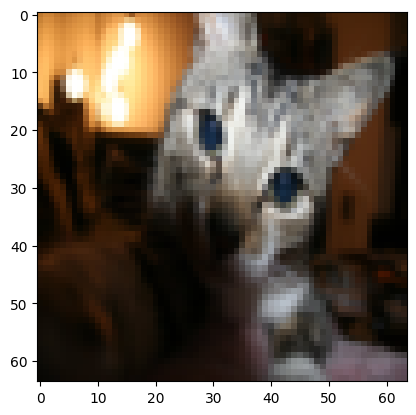

Predicted probabilities: [[0.95646376]]
Our model says it is: cat


In [93]:
predictions = predict(X_test, parameters)
accuracy_test = np.mean(predictions == Y_test) * 100
print("Test accuracy: {:.2f}%".format(accuracy_test))

idx = int(random.randrange(0, X_test.shape[1]))

plt.imshow(X_test[:, idx].reshape((64, 64, 3)))
plt.show()
A2, _ = forward_propagation(X_test[:, idx].reshape(X_test[:, idx].shape[0], 1), parameters)
print("Predicted probabilities:", A2)
a_pred = (A2 > 0.5).astype(int)
# Map the predicted class to a label
label = "cat" if a_pred[0, 0] == 1 else "not cat"
print("Our model says it is:", label)